# Archana MP

Titanics dataset


In [1]:
file_path = 'titanic.csv'

In [3]:
import pandas as pd

#loading the dataset
df = pd.read_csv(file_path)
df.head()





,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There is a total of 891 recordes in the dataset.

In [14]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# prompt: check for duplicates in the dataset

print(df.duplicated().sum())


0


There no dupicates in the dataset.

In [19]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [21]:
# Finding Null Values
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are missing values in:


1.   Age: we can fill it using median.
2.   Cabin: to handle this we can delete the column as its not a important feature.
1.   Embarked: filling with mode.







In [24]:
# Count of missing values
missing = df.isnull().sum().sort_values(ascending=False)

# Percentage of missing values
missing_percent = (df.isnull().sum() / len(df)) * 100

# Combine
missing_data = pd.DataFrame({'Missing Values': missing, '% of Total': missing_percent})
print(missing_data[missing_data['Missing Values'] > 0])


          Missing Values  % of Total
Age                  177   19.865320
Cabin                687   77.104377
Embarked               2    0.224467



*   Age: missing values perentage is less than 30% hence we are filling using median.
*   Cabin: more than 30% computing will give false result for futher analysis hence deleting the column.

*   Embarked: filling with mode.















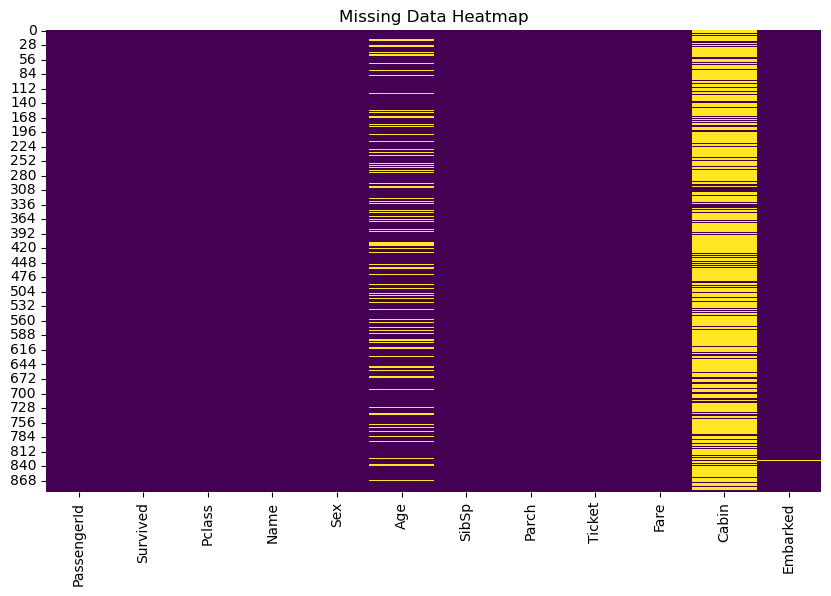

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


In [31]:
#  'Embarked' filling with mode
df.fillna({'Embarked': df['Embarked'].mode()[0]}, inplace=True)


In [33]:
# Calculate the median age
median_age = df['Age'].median()

# Fill missing age values with the median age
df.fillna({'Age': median_age}, inplace=True)

In [35]:
# prompt: drop the column cabin

df.drop('Cabin', axis=1, inplace=True)


In [37]:
# Verify the changes
#checking for null values gain it should show 0.
print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [39]:
#Categorical and Numerical Columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
print("Categorial cols:\n",categorical_cols)
print( "Numerical cols:\n",numerical_cols)

Categorial cols:
 ['Name', 'Sex', 'Ticket', 'Embarked']
Numerical cols:
 ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


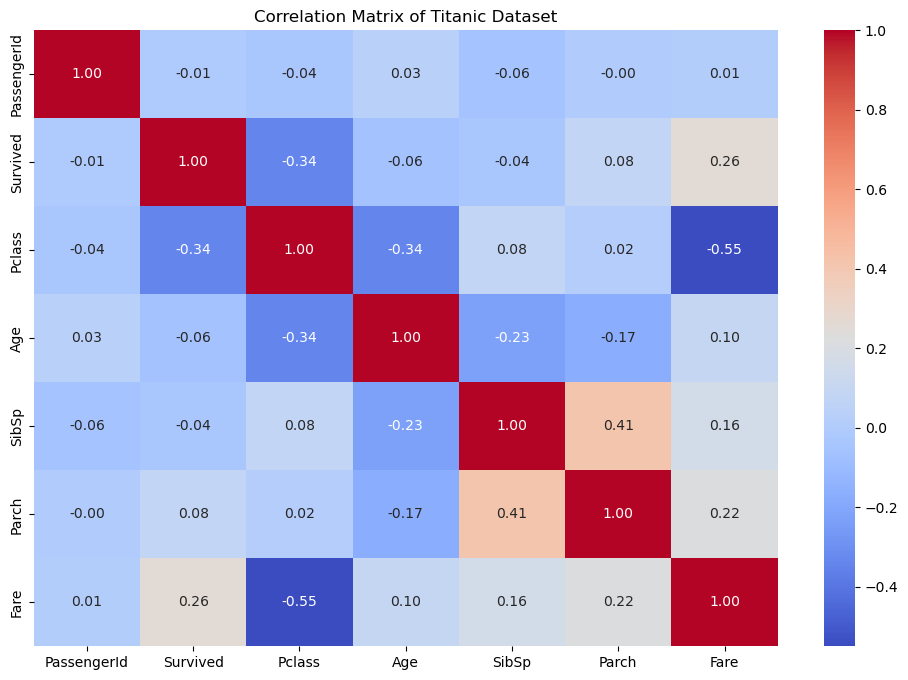

In [41]:

import matplotlib.pyplot as plt
# Correlation map
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()

Key Observations from the Correlation Matrix
1. Survival Correlations:

**Fare** has a positive correlation with Survived (0.26) → Passengers who paid more had higher survival chances.

**Pclass** has a negative correlation with Survived (-0.34) → Lower class (higher number) had lower survival.

These two features are informative for modeling survival and should be retained.

2. Collinearity Check:

SibSp and Parch are moderately correlated (0.41). Consider combining them into a new feature like FamilySize = SibSp + Parch + 1.

2. Weak Correlations:

**PassengerId** has no meaningful correlation with anything. It's just an identifier — safe to drop for modeling.

**Age** has weak correlation with Survived (-0.07), but it may still be valuable in nonlinear models
these 2 feature can be droped

In [43]:
#deleting no required features for the dataset

df.drop(['PassengerId'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


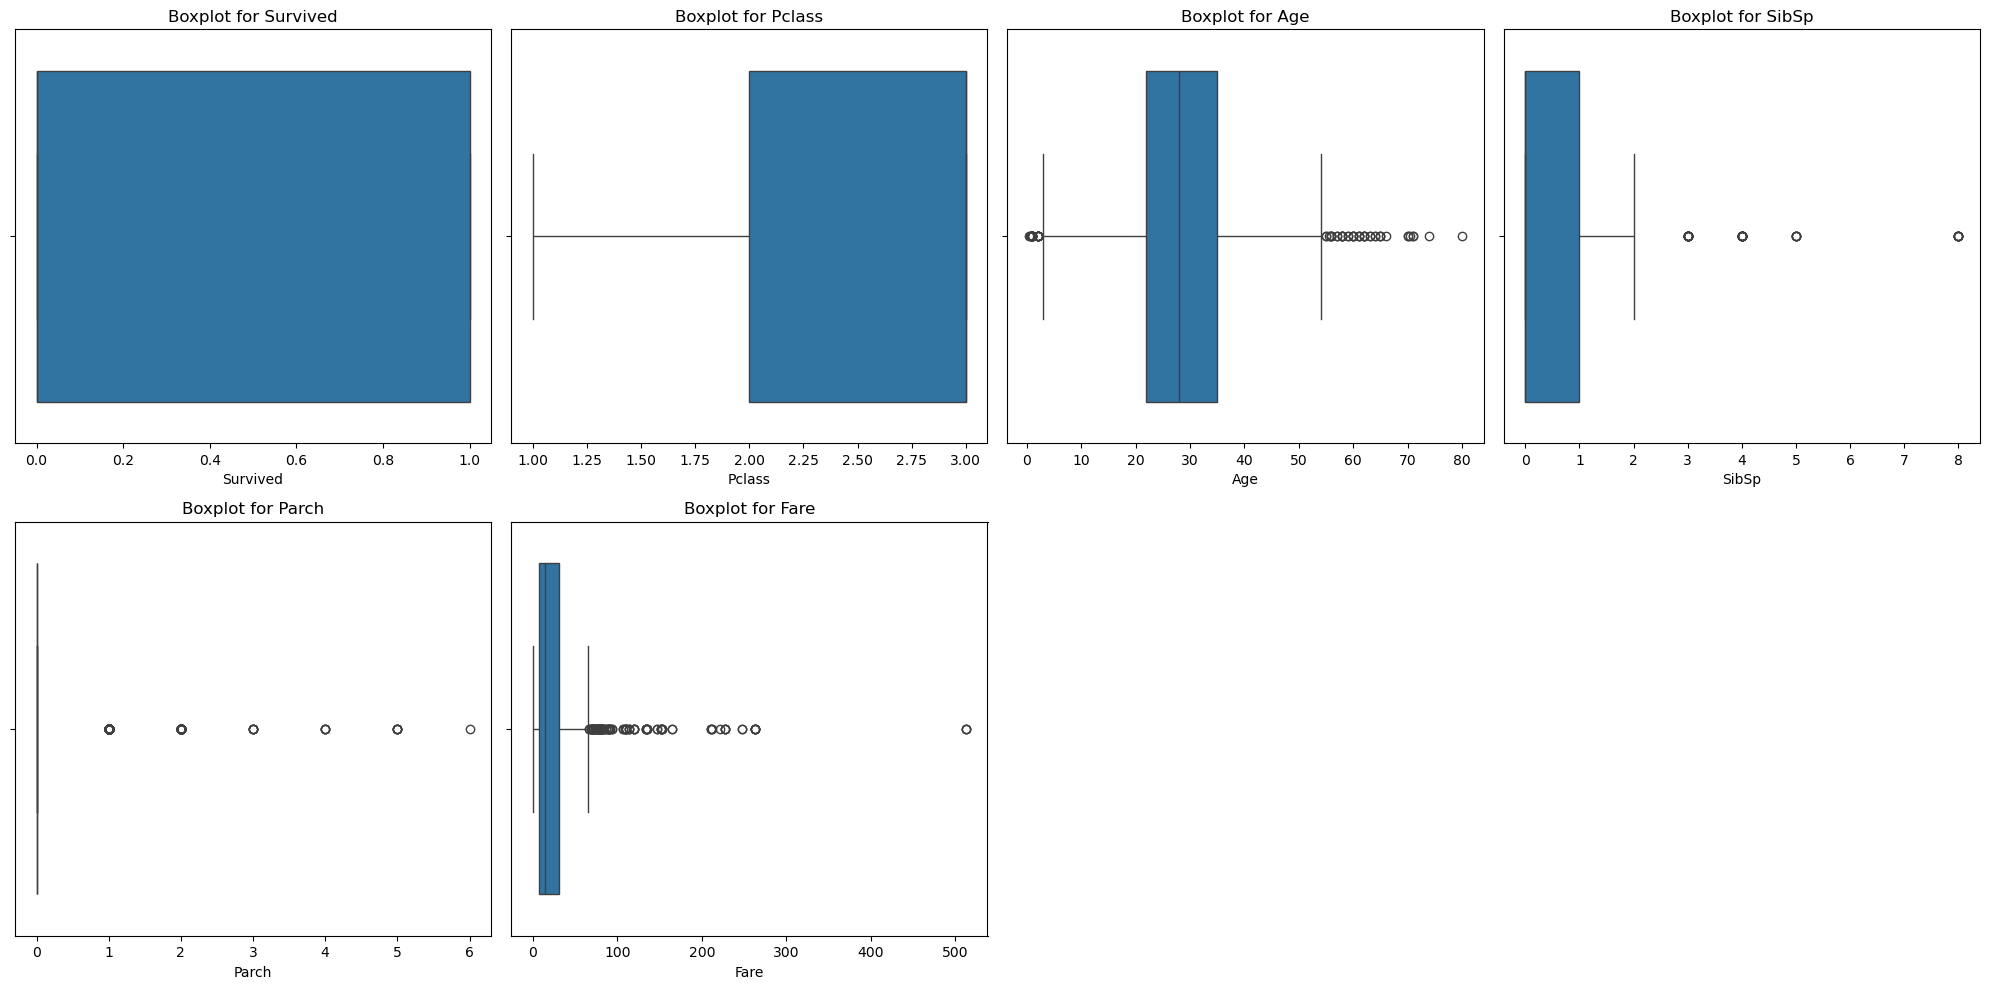

In [45]:
#checking for outliers
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Determine the number of rows and columns for subplots
n_cols = 4
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols # Calculate required rows

plt.figure(figsize=(20, n_rows * 5)) # Adjust figure size based on rows

# Create a figure for each numerical column to visually check for outliers using boxplots
for i,col in enumerate(numerical_cols):
    # Use the calculated grid size
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

In [47]:
# Handling outliers (assuming a simple method to remove outliers)
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

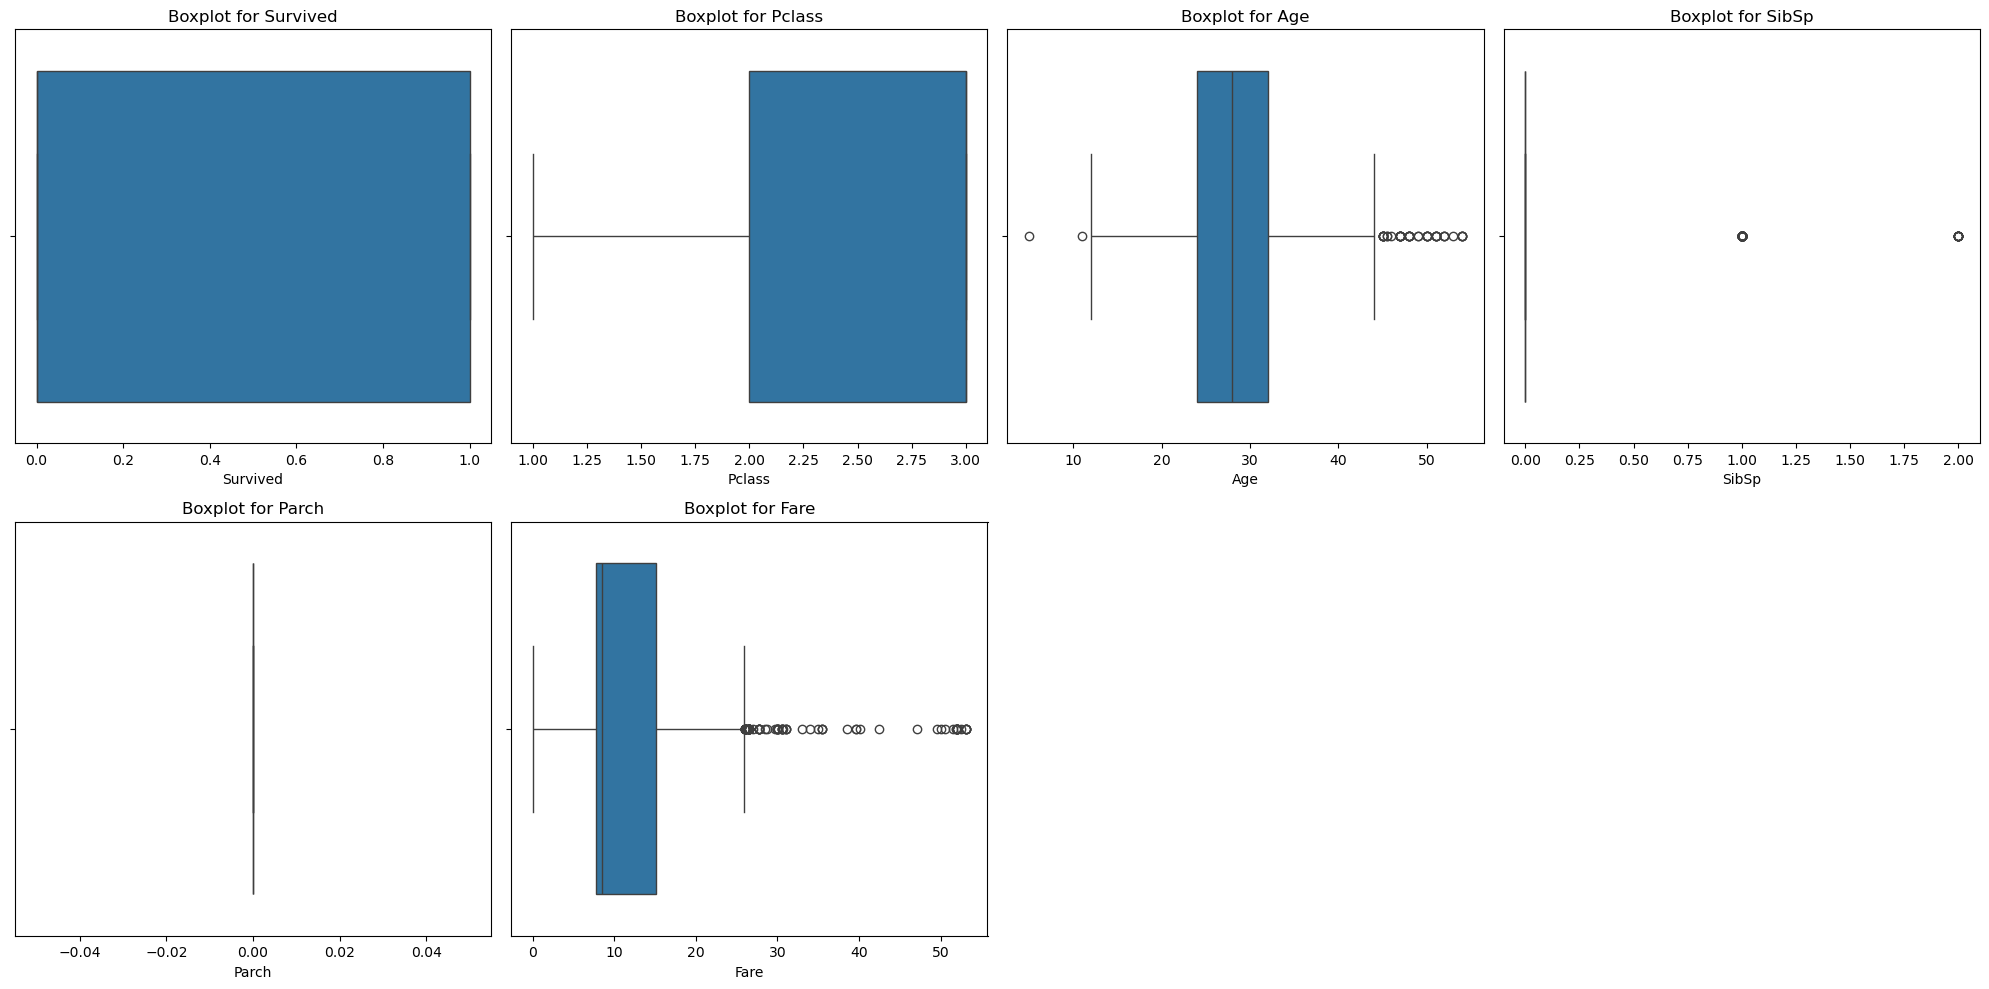

In [49]:
# Determine the number of rows and columns for subplots
n_cols = 4
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols # Calculate required rows

plt.figure(figsize=(20, n_rows * 5)) # Adjust figure size based on rows

# Create a figure for each numerical column to visually check for outliers using boxplots
for i,col in enumerate(numerical_cols):
    # Use the calculated grid size
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

In [51]:
# Creating new feature 'FamilySize' column
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1
5,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,1


In [53]:
df['IsAlone'] = 1  # Default is alone
df.loc[df['FamilySize'] > 1, 'IsAlone'] = 0

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1
5,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,1,1


In [55]:
df['FareBin'] = pd.qcut(df['Fare'], 4)
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 80], labels=False)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone,FareBin,AgeBin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0,"(-0.001, 7.775]",2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,"(7.775, 8.458]",2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,"(15.05, 53.1]",2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,"(7.775, 8.458]",2
5,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,1,1,"(7.775, 8.458]",2


In [57]:
# Label Encoding example
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone,FareBin,AgeBin
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,2,0,"(-0.001, 7.775]",2
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,1,"(7.775, 8.458]",2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,2,0,"(15.05, 53.1]",2
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1,1,"(7.775, 8.458]",2
5,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,2,1,1,"(7.775, 8.458]",2


Survived      0.944319
Pclass       -1.150755
Sex           1.171619
Age           0.787404
SibSp         2.245019
Parch         0.000000
Fare          2.021762
Embarked      1.604995
FamilySize    2.245019
IsAlone      -1.751168
AgeBin       -0.260252
dtype: float64


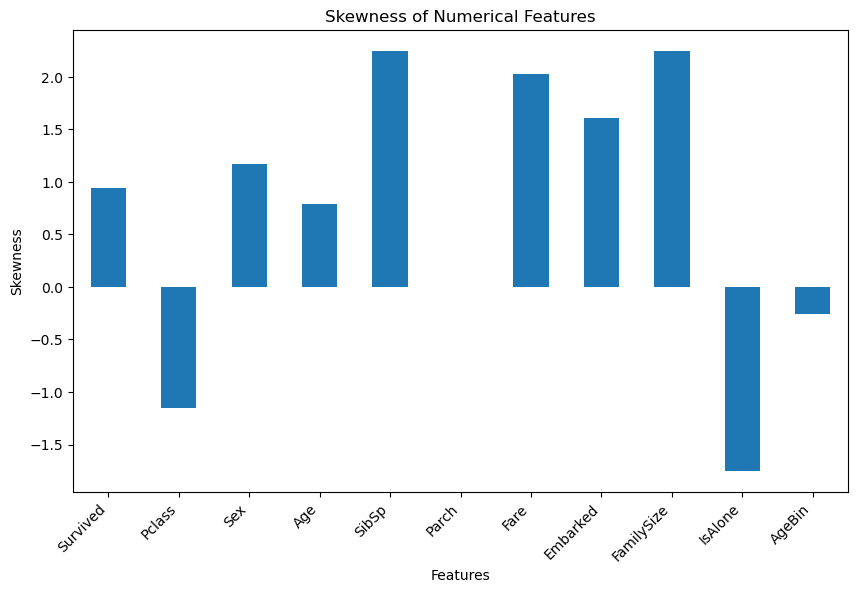

In [59]:
# prompt: CREATE A SKEW MAP

import matplotlib.pyplot as plt
# Skewness of numerical features
skew_features = df.select_dtypes(include=['number']).skew()
print(skew_features)

# Plotting the skewness
plt.figure(figsize=(10, 6))
skew_features.plot(kind='bar')
plt.title('Skewness of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.xticks(rotation=45, ha='right')
plt.show()


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Drop the non-numeric columns 'Name' and 'Ticket'
X = df.drop(['Survived', 'Name', 'Ticket'], axis=1)
y = df['Survived']

# Before splitting, handle the 'FareBin' and 'AgeBin' categorical columns
# One-hot encode 'FareBin' and 'AgeBin'
X = pd.get_dummies(X, columns=['FareBin', 'AgeBin'], drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# The model should now fit without the ValueError
print("Model fitted successfully!")

Model fitted successfully!


In [63]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8230088495575221
[[71  8]
 [12 22]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        79
           1       0.73      0.65      0.69        34

    accuracy                           0.82       113
   macro avg       0.79      0.77      0.78       113
weighted avg       0.82      0.82      0.82       113



True Negatives (TN): 71 passengers were correctly predicted as not survived.

False Positives (FP): 8 passengers were incorrectly predicted as survived, but actually did not survive.

False Negatives (FN): 12 passengers were predicted as not survived, but they actually survived.

True Positives (TP): 22 passengers were correctly predicted as survived.

The model performs better at predicting non-survivors (class 0) compared to survivors.

The recall for survivors (65%) is lower, meaning the model misses some survivors.

Class imbalance (more non-survivors than survivors) might be impacting the model’s recall for survivors.

In [65]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, class_weight='balanced')

In [67]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [69]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [71]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200], 'max_depth': [4, 6, 8]}
grid = GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': [4, 6, 8], 'n_estimators': [100, 200]})

In [73]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='f1')
print(f"Cross-validated F1 score: {scores.mean()}")

Cross-validated F1 score: 0.6297486953030911


In [75]:
from sklearn.metrics import roc_auc_score

y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_prob)}")

ROC-AUC Score: 0.757632166790767


Random Forest is the better model overall.

It shows better F1 score and ROC-AUC, both key in imbalanced classification problems like Titanic survival.

Cross-validation score (F1) is a stronger indicator of model stability and generalization than a single test set accuracy.

